<a href="https://colab.research.google.com/github/awuung/Machine-Learning/blob/main/Tugas2_Nama_PMB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Awang Pratama Putra Mulya

24060122120039

# Tugas 2

1. Lakukan clustering menggunakan dataset masing-masing (2 fitur atau lebih). Gunakan elbow method untuk menentukan nilai k optimal.

In [54]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics.cluster import silhouette_score

In [55]:

data = pd.read_csv('/content/Pokemon.csv')
# link dataset
url = 'https://www.kaggle.com/datasets/abcsds/pokemon'
nama_dataset = "Pokemon"


In [41]:
data.shape

(800, 13)

In [42]:
data.dtypes

,0
#,int64
Name,object
Type 1,object
Type 2,object
Total,int64
HP,int64
Attack,int64
Defense,int64
Sp. Atk,int64
Sp. Def,int64


In [43]:
data.head(20)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


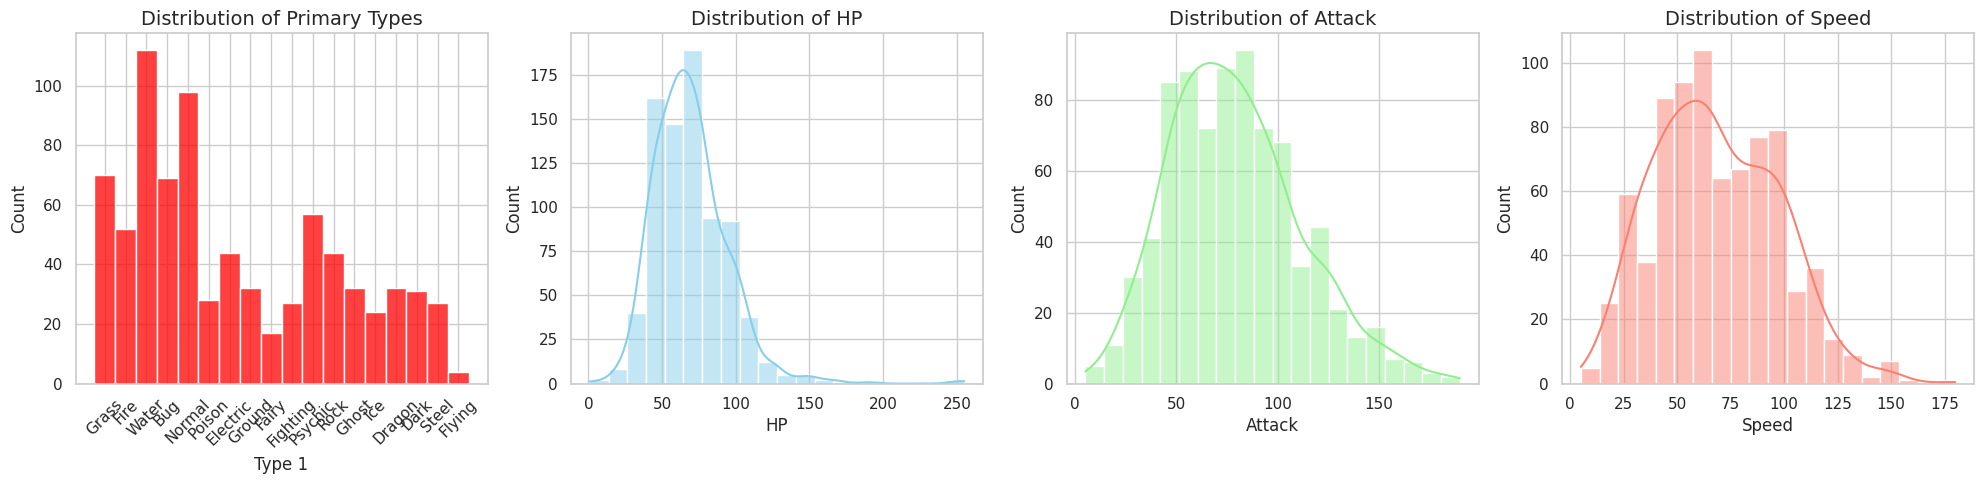

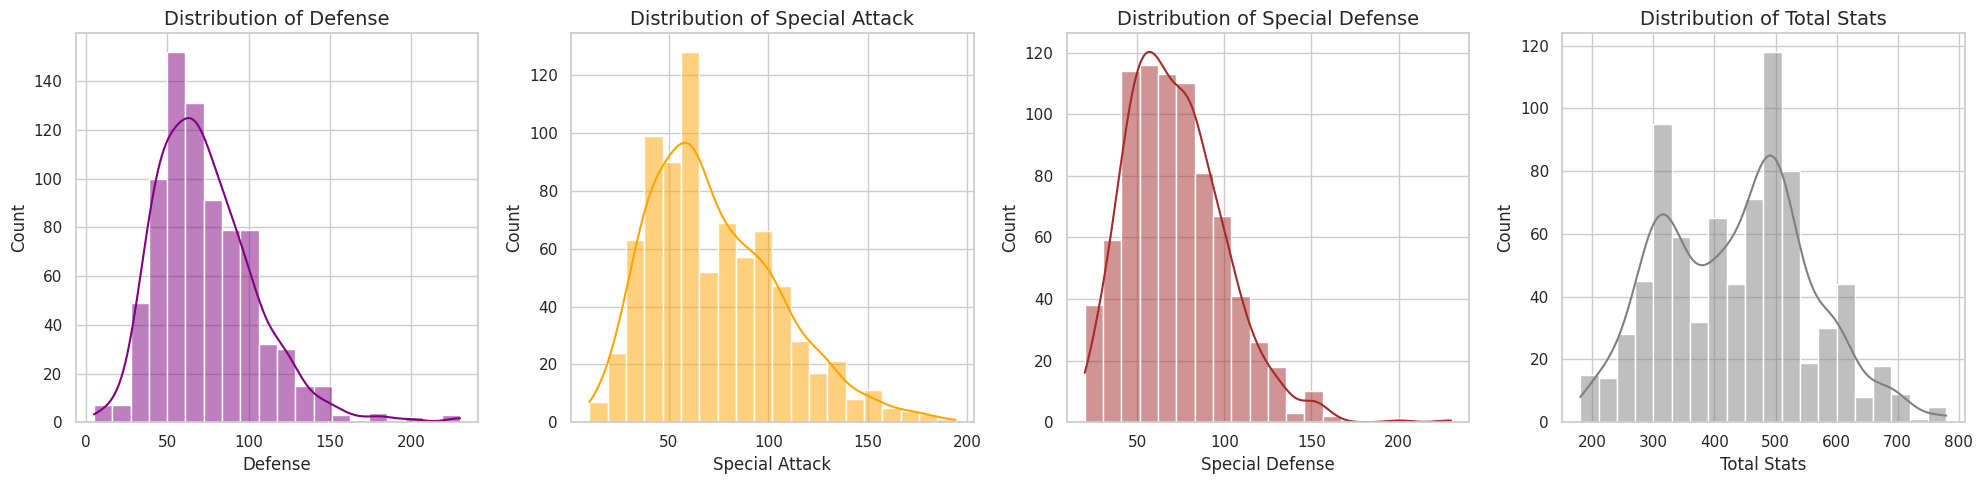


Basic Statistics of Pokemon Stats:
               HP      Attack     Defense     Sp. Atk     Sp. Def       Speed  \
count  800.000000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean    69.258750   79.001250   73.842500   72.820000   71.902500   68.277500   
std     25.534669   32.457366   31.183501   32.722294   27.828916   29.060474   
min      1.000000    5.000000    5.000000   10.000000   20.000000    5.000000   
25%     50.000000   55.000000   50.000000   49.750000   50.000000   45.000000   
50%     65.000000   75.000000   70.000000   65.000000   70.000000   65.000000   
75%     80.000000  100.000000   90.000000   95.000000   90.000000   90.000000   
max    255.000000  190.000000  230.000000  194.000000  230.000000  180.000000   

           Total  
count  800.00000  
mean   435.10250  
std    119.96304  
min    180.00000  
25%    330.00000  
50%    450.00000  
75%    515.00000  
max    780.00000  

Primary Type Distribution:
Type 1
Water       112
Normal      

In [27]:
# Set style for better aesthetics
sns.set_theme(style="whitegrid")

# Create subplots for different Pokemon stats
plt.figure(figsize=(20, 5))

# Plot for Type 1 distribution
plt.subplot(1, 4, 1)
sns.histplot(data=data['Type 1'], color='red')
plt.title('Distribution of Primary Types', fontsize=14)
plt.xlabel('Type 1', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

# Plot for HP distribution
plt.subplot(1, 4, 2)
sns.histplot(data=data['HP'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of HP', fontsize=14)
plt.xlabel('HP', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Plot for Attack distribution
plt.subplot(1, 4, 3)
sns.histplot(data=data['Attack'], kde=True, bins=20, color='lightgreen')
plt.title('Distribution of Attack', fontsize=14)
plt.xlabel('Attack', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Plot for Speed distribution
plt.subplot(1, 4, 4)
sns.histplot(data=data['Speed'], kde=True, bins=20, color='salmon')
plt.title('Distribution of Speed', fontsize=14)
plt.xlabel('Speed', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

# Create another set of histograms for remaining stats
plt.figure(figsize=(20, 5))

# Plot for Defense distribution
plt.subplot(1, 4, 1)
sns.histplot(data=data['Defense'], kde=True, bins=20, color='purple')
plt.title('Distribution of Defense', fontsize=14)
plt.xlabel('Defense', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Plot for Special Attack distribution
plt.subplot(1, 4, 2)
sns.histplot(data=data['Sp. Atk'], kde=True, bins=20, color='orange')
plt.title('Distribution of Special Attack', fontsize=14)
plt.xlabel('Special Attack', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Plot for Special Defense distribution
plt.subplot(1, 4, 3)
sns.histplot(data=data['Sp. Def'], kde=True, bins=20, color='brown')
plt.title('Distribution of Special Defense', fontsize=14)
plt.xlabel('Special Defense', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Plot for Total Stats distribution
plt.subplot(1, 4, 4)
sns.histplot(data=data['Total'], kde=True, bins=20, color='gray')
plt.title('Distribution of Total Stats', fontsize=14)
plt.xlabel('Total Stats', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

# Print some basic statistics
print("\nBasic Statistics of Pokemon Stats:")
stats_columns = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total']
print(data[stats_columns].describe())

# Print Type 1 distribution
print("\nPrimary Type Distribution:")
print(data['Type 1'].value_counts())

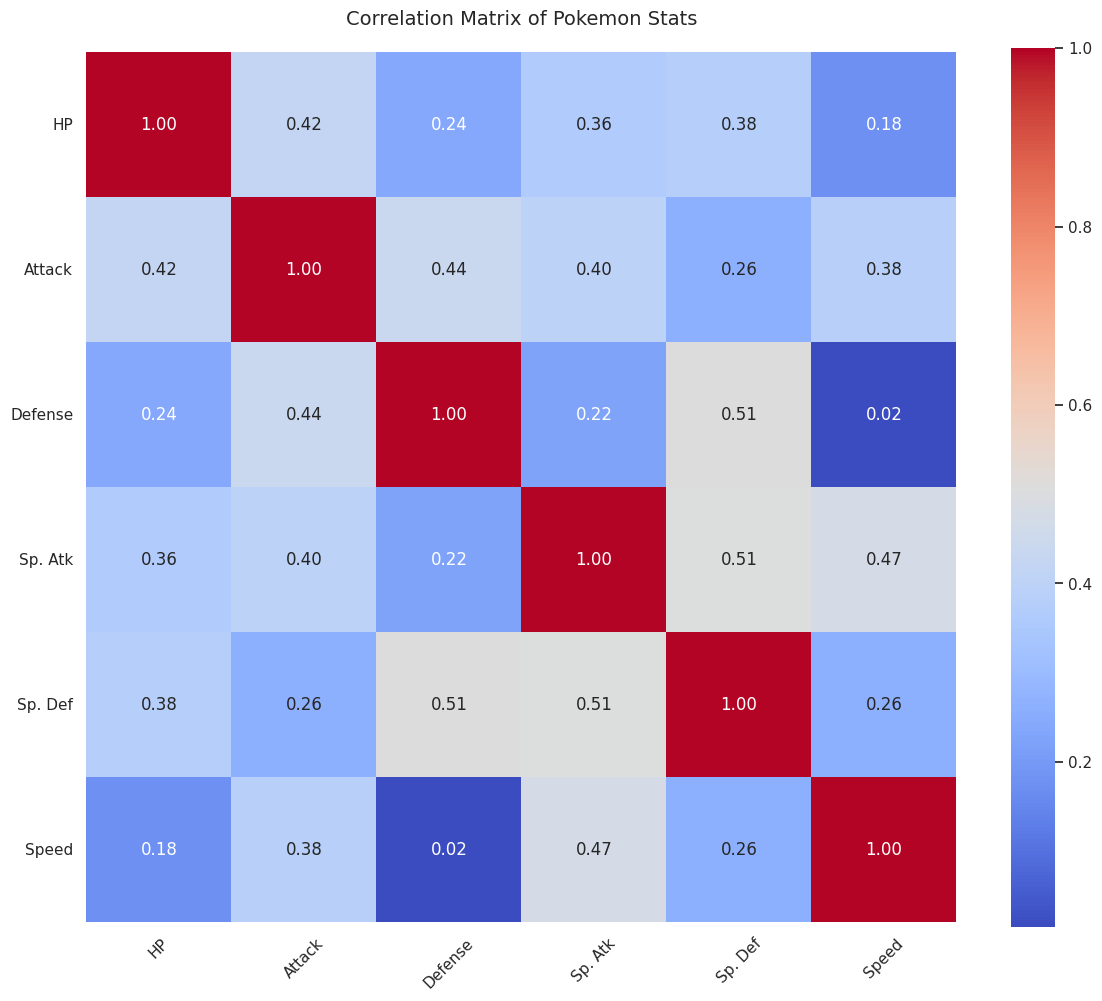


Interpretasi Korelasi Kuat (>0.5 atau <-0.5):
Defense vs Sp. Def: 0.51
Sp. Atk vs Sp. Def: 0.51


In [44]:
# Memilih kolom numerik untuk analisis korelasi
numeric_columns = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
data_for_corr = data[numeric_columns]

# Menghitung matriks korelasi
corr = data_for_corr.corr()

# Membuat heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Pokemon Stats', fontsize=14, pad=20)

# Rotate tick labels
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

# Print interpretasi korelasi
print("\nInterpretasi Korelasi Kuat (>0.5 atau <-0.5):")
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        if abs(corr.iloc[i,j]) > 0.5:
            print(f"{corr.columns[i]} vs {corr.columns[j]}: {corr.iloc[i,j]:.2f}")

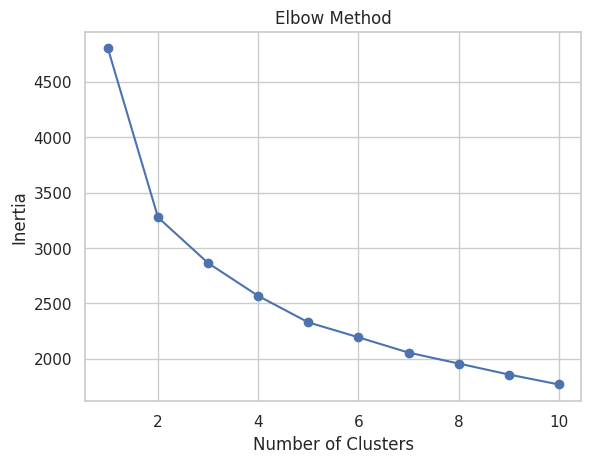

In [60]:
# Memilih fitur yang akan digunakan untuk clustering
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
X1 = data[features].iloc[:, :].values

# Standarisasi fitur
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)

# Menyiapkan list untuk menyimpan nilai inertia untuk setiap jumlah cluster
inertia = []

# Loop untuk menguji jumlah cluster dari 1 hingga 10
for n in range(1, 11):
    # Membuat objek KMeans dengan jumlah cluster = n
    algorithm = KMeans(n_clusters=n,          # Menentukan jumlah cluster (n)
                      init='k-means++',       # Menggunakan metode k-means++ untuk inisialisasi pusat cluster
                      n_init=10,              # Melakukan inisialisasi sebanyak 10 kali dan memilih yang terbaik
                      max_iter=300,           # Membatasi jumlah iterasi maksimal sampai 300 kali
                      tol=0.0001,             # Toleransi untuk konvergensi
                      random_state=111,       # Menetapkan random seed
                     )

    # Melatih model KMeans dengan data X1
    algorithm.fit(X1)

    # Menyimpan nilai inertia yang dihasilkan oleh KMeans untuk jumlah cluster ini
    inertia.append(algorithm.inertia_)

# Membuat plot elbow method
plt.plot(range(1, 11), inertia, marker='o')  # Menampilkan inertia dengan marker 'o'
plt.title('Elbow Method')                    # Menambahkan judul grafik
plt.xlabel('Number of Clusters')             # Label sumbu X untuk jumlah cluster
plt.ylabel('Inertia')                        # Label sumbu Y untuk nilai inertia
plt.show()                                   # Menampilkan grafik

2. ⁠Lakukan evaluasi hasil clustering menggunakan inertia dan silhouette coefficient

In [85]:
for k in range (1, 10):
    # Menentukan jumlah cluster
    kmeans = KMeans(n_clusters=k, random_state=1)
    # Fitting input data
    kmeans = kmeans.fit(X)
    # Mendapatkan cluster labels
    labels = kmeans.predict(X)
    # Menghitung jumlahan jarak antara setiap sampel dengan cluster centroid-nya (SSE)
    interia = kmeans.inertia_
    print("k:",k, " cost:", interia)
    print("")

k: 1  cost: 4288727.462500006

k: 2  cost: 2919114.809098041

k: 3  cost: 2540624.9125041184

k: 4  cost: 2250926.3945137886

k: 5  cost: 2069887.9400542546

k: 6  cost: 1970261.520644827

k: 7  cost: 1859594.2332567442

k: 8  cost: 1768871.3257649818

k: 9  cost: 1689600.342804279



In [83]:
# ... (Your previous code for data loading and preprocessing) ...

# Prepare a list to store the silhouette scores for each number of clusters
silhouette_scores = []

# Loop through different numbers of clusters (e.g., 2 to 10)
for n_clusters in range(2, 11):
    # Create and fit the KMeans model
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111)
    cluster_labels = kmeans.fit_predict(X1)

    # Calculate the silhouette score and append it to the list
    silhouette_avg = silhouette_score(X1, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Create the evaluation DataFrame using pandas
evaluation_df = pd.DataFrame({'n_clusters': range(2, 11), 'silhouette_score': silhouette_scores})

# Print the evaluation DataFrame to inspect the silhouette scores
print(evaluation_df)

# Now you can proceed to select the best cluster based on the highest silhouette score
best_k = evaluation_df.loc[evaluation_df['silhouette_score'].idxmax(), 'n_clusters']


   n_clusters  silhouette_score
0           2          0.288577
1           3          0.255950
2           4          0.224372
3           5          0.225468
4           6          0.231076
5           7          0.225542
6           8          0.165573
7           9          0.157429
8          10          0.162173
